In [71]:
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

# Estadísticos
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import skew
from scipy.stats import kurtosistest
from scipy import stats


# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('once')

In [72]:
df = pd.read_csv("../archivos/est_cod_bikes.csv", index_col = 0)
df.head()

,estacion,dias_festivos,temperatura,humedad,velocidad_viento,clientes_casuales,clientes_registrados,total_bicis,dia_semana_domingo,dia_semana_jueves,...,mes_3,mes_4,mes_5,mes_6,mes_7,mes_8,mes_9,mes_10,mes_11,mes_12
0,0,1,-0.486274,0.855582,-0.208909,331,654,985,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,-0.425690,0.332722,0.687550,131,670,801,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,-0.949970,-0.900337,0.685210,120,1229,1349,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,-0.938563,-0.170632,-0.210435,108,1454,1562,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,-0.853992,-0.901843,0.060294,82,1518,1600,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
df.drop(['clientes_registrados','clientes_casuales','estacion','dias_festivos','mes_1','mes_2','mes_3','mes_6','mes_8'], axis=1,inplace=True)

In [74]:
df.head()

,temperatura,humedad,velocidad_viento,total_bicis,dia_semana_domingo,dia_semana_jueves,dia_semana_lunes,dia_semana_martes,dia_semana_miercoles,dia_semana_sabado,dia_semana_viernes,mes_4,mes_5,mes_7,mes_9,mes_10,mes_11,mes_12
0,-0.486274,0.855582,-0.208909,985,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,-0.425690,0.332722,0.687550,801,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,-0.949970,-0.900337,0.685210,1349,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,-0.938563,-0.170632,-0.210435,1562,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,-0.853992,-0.901843,0.060294,1600,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [75]:
X = df.drop("total_bicis", axis = 1)
y = df["total_bicis"]

In [76]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [77]:
arbol = DecisionTreeRegressor(random_state =0)

# ajustamos el modelo, igual que en la regresión lienal. 
arbol.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [78]:
max_features = np.sqrt(len(x_train.columns))
max_features

4.123105625617661

In [79]:
print(arbol.tree_.max_depth)

23


In [80]:
y_pred_test_dt = arbol.predict(x_test)
y_pred_train_dt = arbol.predict(x_train)

In [81]:
def metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):
    
    
    resultados = {'MAE': [mean_absolute_error(y_test, y_test_pred), mean_absolute_error(y_train, y_train_pred)],
                'MSE': [mean_squared_error(y_test, y_test_pred), mean_squared_error(y_train, y_train_pred)],
                'RMSE': [np.sqrt(mean_squared_error(y_test, y_test_pred)), np.sqrt(mean_squared_error(y_train, y_train_pred))],
                'R2':  [r2_score(y_test, y_test_pred), r2_score(y_train, y_train_pred)],
                 "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df

In [82]:
dt_results1 = metricas(y_test, y_train, y_pred_test_dt, y_pred_train_dt, "Decission Tree I")
dt_results1

,MAE,MSE,RMSE,R2,set,modelo
0,1555.746575,4.001961e+06,2000.490123,-0.169192,test,Decission Tree I
1,0.000000,0.000000e+00,0.000000,1.000000,train,Decission Tree I


In [104]:
param = {"max_depth": [2,4,8], # teniendo en cuenta que teníamos overfitting tendremos que reducir la profundidad del modelo, la nuestra anterior era de 17. Bajaremos mucho este valor ya que teníamos un overfitting muy claro
        "max_features": [1,2,3,4],# calculamos en celdas anteriores, probaremos a hacer el modelo como una variable, 2, 3 y 4. Ponemos como límite el 4 ya que es el resultado de la raiz cuadrada. 
        # estos dos hiperparámetros son más difíciles de definir, pero usualmente se suelen elegir los siguientes valores
        "min_samples_split": [10, 20, 50,100],
        "min_samples_leaf": [5,10, 20,50]} 

In [105]:
gs = GridSearchCV(
            estimator=DecisionTreeRegressor(), # tipo de modelo que queremos hacer
            param_grid= param, # que hiperparámetros queremos que testee
            cv=10, # crossvalidation que aprendimos en la lección de regresión lineal intro. 
            verbose=-1, # para que no nos printee ningún mensaje en pantalla
            return_train_score = True, # para que nos devuelva el valor de las métricas de set de datos de entrenamiento
            scoring="neg_mean_squared_error") 

In [106]:
gs.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 4, 8], 'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [5, 10, 20, 50],
                         'min_samples_split': [10, 20, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=-1)

In [107]:
mejor_modelo = gs.best_estimator_
mejor_modelo

DecisionTreeRegressor(max_depth=8, max_features=4, min_samples_leaf=5,
                      min_samples_split=20)

In [108]:
y_pred_test_dt2 = mejor_modelo.predict(x_test)
y_pred_train_dt2 = mejor_modelo.predict(x_train)

In [109]:
dt_results2 = metricas(y_test, y_train, y_pred_test_dt2, y_pred_train_dt2, "Decision tree II")
dt_results2

,MAE,MSE,RMSE,R2,set,modelo
0,1182.052189,1.982599e+06,1408.047893,0.420774,test,Decision tree II
1,1030.779740,1.574764e+06,1254.896127,0.587293,train,Decision tree II


In [110]:

# vamos a crearnos un dataframe 
importancia_predictores_esta = pd.DataFrame(
                            {'predictor': x_train.columns,
                             'importancia': mejor_modelo.feature_importances_}
                            )


# ordenamos de mayor a menor los resultados
importancia_predictores_esta.sort_values(by=["importancia"], ascending=False, inplace = True)

# printeamos los resultados
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores_esta


Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
0,temperatura,0.710240
1,humedad,0.168820
2,velocidad_viento,0.060668
12,mes_7,0.014585
8,dia_semana_sabado,0.012684
6,dia_semana_martes,0.009019
15,mes_11,0.008809
4,dia_semana_jueves,0.005184
3,dia_semana_domingo,0.005076
5,dia_semana_lunes,0.003397


In [111]:
df.columns

Index(['temperatura', 'humedad', 'velocidad_viento', 'total_bicis',
       'dia_semana_domingo', 'dia_semana_jueves', 'dia_semana_lunes',
       'dia_semana_martes', 'dia_semana_miercoles', 'dia_semana_sabado',
       'dia_semana_viernes', 'mes_4', 'mes_5', 'mes_7', 'mes_9', 'mes_10',
       'mes_11', 'mes_12'],
      dtype='object')

In [112]:
lm = ols('total_bicis ~  temperatura + humedad + velocidad_viento + dia_semana_domingo + dia_semana_jueves + dia_semana_lunes + dia_semana_martes + dia_semana_miercoles + dia_semana_sabado + dia_semana_viernes +mes_4+mes_5+mes_7+mes_9+mes_10+mes_11+mes_12',  data = df).fit()
sm.stats.anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
temperatura,1.0,1.074335e+09,1.074335e+09,608.297814,1.357182e-97
humedad,1.0,8.917788e+07,8.917788e+07,50.493310,2.905284e-12
velocidad_viento,1.0,9.337474e+07,9.337474e+07,52.869612,9.399330e-13
dia_semana_domingo,1.0,3.123959e+06,3.123959e+06,1.768813,1.839543e-01
dia_semana_jueves,1.0,1.657088e+06,1.657088e+06,0.938258,3.330547e-01
dia_semana_lunes,1.0,8.215207e+05,8.215207e+05,0.465152,4.954473e-01
dia_semana_martes,1.0,1.422580e+06,1.422580e+06,0.805477,3.697637e-01
dia_semana_miercoles,1.0,6.912390e+05,6.912390e+05,0.391386,5.317721e-01
dia_semana_sabado,1.0,2.842381e+01,2.842381e+01,0.000016,9.968002e-01
dia_semana_viernes,1.0,4.999251e+06,4.999251e+06,2.830620,9.292046e-02


In [113]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_bicis   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     52.13
Date:                Mon, 06 Feb 2023   Prob (F-statistic):          2.44e-108
Time:                        14:30:55   Log-Likelihood:                -6277.5
No. Observations:                 730   AIC:                         1.259e+04
Df Residuals:                     713   BIC:                         1.267e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             3675.6849     68.915     53.337      0.000    3540.385    3810.985
temperatura           2351.8714    109.015     21.574      0.000    2137.842    2565.901
humedad               -875.7963     79.357    -11.036      0.000   -1031.598    -719.994
velocidad_viento      -459.1918     66.196     -6.937      0.000    -589.153    -329.230
dia_semana_domingo     675.2884    121.328      5.566      0.000     437.086     913.491
dia_semana_jueves      600.4386    121.054      4.960      0.000     362.774     838.103
dia_semana_lunes       406.1612    121.001      3.357      0.001     168.601     643.721
dia_semana_martes      413.6267    120.826      3.423      0.001     176.410     650.843
dia_semana_miercoles   465.2006    121.074      3.842      0.000     227.497     702.905
dia_semana_sabado      547.1626    121.106      4.518      0.000     309.396     784.930
dia_semana_viernes     567.8069    121.050      4.691      0.000     330.151     805.463
mes_4                  593.3442    189.308      3.134      0.002     221.677     965.011
mes_5                  715.0518    192.784      3.709      0.000     336.560    1093.544
mes_7                 -710.3414    210.460     -3.375      0.001   -1123.537    -297.146
mes_9                  995.6034    198.816      5.008      0.000     605.269    1385.938
mes_10                1363.8417    189.363      7.202      0.000     992.065    1735.618
mes_11                1009.6331    191.809      5.264      0.000     633.054    1386.212
mes_12                 641.3081    195.036      3.288      0.001     258.394    1024.222
==============================================================================
Omnibus:                       11.158   Durbin-Watson:                   0.467
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                6.824
Skew:                           0.022   Prob(JB):                       0.0330
Kurtosis:                       2.528   Cond. No.                     5.92e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.52e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

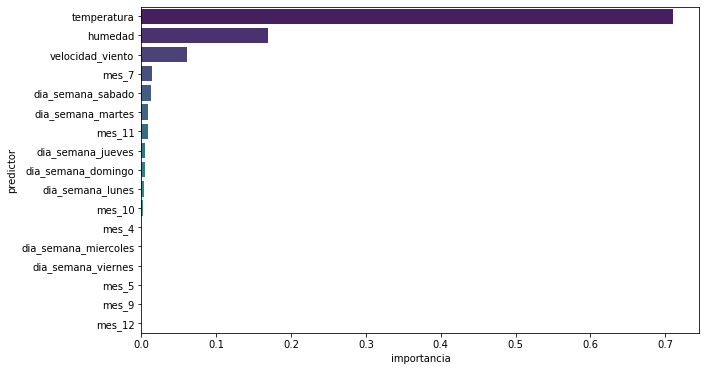

In [114]:
# por último ploteamos los resultados para verlo de una forma más amigable. 

plt.figure(figsize=(10,6))
sns.barplot(x = "importancia", y = "predictor", data = importancia_predictores_esta, palette="viridis");
plt.show()